<a href="https://colab.research.google.com/github/mart-anthony-stark/Machine-Learning-and-Deep-Learning/blob/main/Housing_Prices_Prediction_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Prices Prediction Competition
Competition Description


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.
https://www.kaggle.com/competitions/home-data-for-ml-course/overview

- File descriptions
  - train.csv - the training set
  - test.csv - the test set
  - data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
  - sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

# Exploring Data

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

# Read dataset
X_full = pd.read_csv("train.csv", index_col='Id')
X_test_full = pd.read_csv("test.csv", index_col='Id')

In [94]:
X_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [95]:
X_full.shape

(1460, 80)

In [96]:
X_full.isna().sum().sum()

6965

## Col Dtypes

In [97]:
numeric_cols = X_full.select_dtypes(exclude=['object'])
cat_cols = X_full.select_dtypes(include=['object'])

## Visualizing Categorical Variables

In [98]:
categorical_cols = cat_cols.columns

In [99]:
def isnull(cols):
  total = 0
  for column in cols:
    nans = X_full[column].isna().sum()
    total += nans
    print(column + " - " + str(nans))
  print("Total missing: "+ str(total))

In [100]:
isnull(list(categorical_cols))

MSZoning - 0
Street - 0
Alley - 1369
LotShape - 0
LandContour - 0
Utilities - 0
LotConfig - 0
LandSlope - 0
Neighborhood - 0
Condition1 - 0
Condition2 - 0
BldgType - 0
HouseStyle - 0
RoofStyle - 0
RoofMatl - 0
Exterior1st - 0
Exterior2nd - 0
MasVnrType - 8
ExterQual - 0
ExterCond - 0
Foundation - 0
BsmtQual - 37
BsmtCond - 37
BsmtExposure - 38
BsmtFinType1 - 37
BsmtFinType2 - 38
Heating - 0
HeatingQC - 0
CentralAir - 0
Electrical - 1
KitchenQual - 0
Functional - 0
FireplaceQu - 690
GarageType - 81
GarageFinish - 81
GarageQual - 81
GarageCond - 81
PavedDrive - 0
PoolQC - 1453
Fence - 1179
MiscFeature - 1406
SaleType - 0
SaleCondition - 0
Total missing: 6617


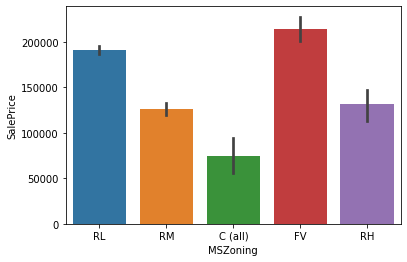

In [101]:
sns.barplot(x='MSZoning', y='SalePrice', data=X_full)
plt.show()

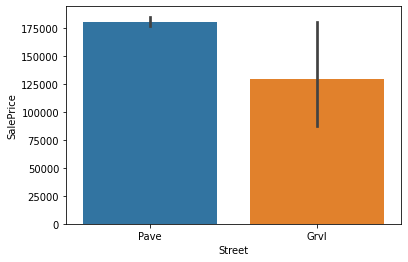

In [102]:
sns.barplot(x='Street', y='SalePrice', data=X_full)
plt.show()

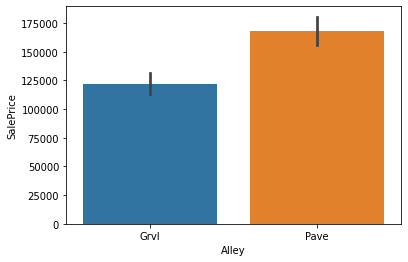

In [103]:
sns.barplot(x='Alley', y='SalePrice', data=X_full)
plt.show()

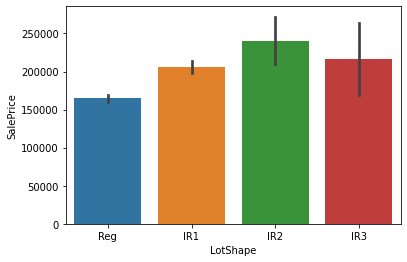

In [104]:
sns.barplot(x='LotShape', y='SalePrice', data=X_full)
plt.show()

# Feature Engineering

### Encoding object as an enumerated type or categorical variable.

In [105]:
X_full[categorical_cols] = X_full[categorical_cols].apply(lambda x: pd.factorize(x)[0])
X_test_full[categorical_cols] = X_test_full[categorical_cols].apply(lambda x: pd.factorize(x)[0])

In [106]:
X_full.shape

(1460, 80)

In [107]:
X_full[categorical_cols].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,-1,-1,0,0
2,0,0,-1,0,0,0,1,0,1,1,...,0,0,0,0,0,-1,-1,-1,0,0
3,0,0,-1,1,0,0,0,0,0,0,...,0,0,0,0,0,-1,-1,-1,0,0
4,0,0,-1,1,0,0,2,0,2,0,...,1,1,0,0,0,-1,-1,-1,0,1
5,0,0,-1,1,0,0,1,0,3,0,...,0,0,0,0,0,-1,-1,-1,0,0


In [108]:
X_full[categorical_cols].isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

# Data Splitting

In [109]:
# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

In [110]:
X_full.isna().sum().sum()

348

In [111]:
X = X_full.select_dtypes(exclude=['object'])
X_test = X_test_full.select_dtypes(exclude=['object'])

# Data Splitting (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [112]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
619,20,0,90.0,11694,0,-1,0,0,0,0,...,260,0,-1,-1,-1,0,7,2007,1,2
871,20,0,60.0,6600,0,-1,0,0,0,0,...,0,0,-1,-1,-1,0,8,2009,0,0
93,30,0,80.0,13360,0,0,1,3,0,0,...,0,0,-1,-1,-1,0,8,2009,0,0
818,20,0,NaN,13265,0,-1,1,0,0,3,...,0,0,-1,-1,-1,0,7,2008,0,0
303,20,0,118.0,13704,0,-1,1,0,0,2,...,0,0,-1,-1,-1,0,1,2006,0,0
